In [1]:
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
###### GRAU ######
# Calcula o grau medio
def mean_degree(G):
    media = (sum([d for n, d in nx.degree(G)]))/nx.number_of_nodes(G)
    return media

# Calcula o grau maximo
def maximum_degree(G):
    maximo = max([d for n, d in nx.degree(G)])
    return maximo

# Calcula o grau minimo
def minimum_degree(G):
    minimo = min([d for n, d in nx.degree(G)])
    return minimo

# Calcula a mediana do grau
def median_degree(G):
    mediana = np.median([d for n, d in nx.degree(G)])
    return mediana

# Calcula o desvio padrao do grau
def standard_deviation_degree(G):
    std = np.std([d for n, d in nx.degree(G)])
    return std

def plot_pdf_degree(G):
    sequencia_grau = sorted([d for n, d in nx.degree(G)])
    contar_grau = Counter(sequencia_grau)
    deg, cnt = zip(*contar_grau.items())
    deg = list(deg)
    cnt = list(cnt)

    # Calcula o percentual de vertices em cada grau (pdf)
    perc = [0]*len(cnt)
    for idx, d in enumerate(cnt):
        perc[idx] = round(d/nx.number_of_nodes(G),4)

    plt.figure(figsize = (12,7))
    plt.plot(deg, perc, 'bo')
    
    plt.title("PDF do grau")
    plt.ylabel("Fração de amostras = x")
    plt.xlabel("x")
    
    plt.xticks([d for d in deg], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()
    
def plot_cdf_degree(G):
    sequencia_grau = sorted([d for n, d in nx.degree(G)])
    contar_grau = Counter(sequencia_grau)
    deg, cnt = zip(*contar_grau.items())
    deg = list(deg)
    cnt = list(cnt)

    # Calcula o percentual de vertices em cada grau (pdf)
    perc = []
    for d in cnt:
        perc.append(round(d/nx.number_of_nodes(G),4))
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
        ite += 1
          
    plt.figure(figsize = (12,7))
    plt.plot(deg, perc_cdf, 'bo')
    
    plt.title("CDF grau")
    plt.ylabel("Fração de amostras <= x")
    plt.xlabel("x")
    
    plt.xticks([d for d in deg], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()

def plot_ccdf_degree(G):
    sequencia_grau = sorted([d for n, d in nx.degree(G)])
    contar_grau = Counter(sequencia_grau)
    deg, cnt = zip(*contar_grau.items())
    deg = list(deg)
    cnt = list(cnt)

    # Calcula o percentual de vertices em cada grau
    perc = []
    for d in cnt:
        perc.append(round(d/nx.number_of_nodes(G),4))
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
        ite += 1
    
    # Calculando a ccdf
    perc_ccdf = []
    for ite in range(len(perc_cdf)):
        if ite == 0:
            perc_ccdf.append(1)
        else:
            perc_ccdf.append(1 - perc_cdf[(ite - 1)])
        
    plt.figure(figsize = (12,7))
    plt.plot(deg, perc_ccdf, 'bo')
    
    plt.title("CCDF empirica do grau")
    plt.ylabel("Fração de amostras >= x")
    plt.xlabel("x")
    
    plt.xticks([d for d in deg], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()
    
def plot_ccdf_degree_log(G):
    sequencia_grau = sorted([d for n, d in nx.degree(G)])
    contar_grau = Counter(sequencia_grau)
    deg, cnt = zip(*contar_grau.items())
    deg = list(deg)
    cnt = list(cnt)

    # Calcula o percentual de vertices em cada grau
    perc = []
    for d in cnt:
        perc.append(round(d/nx.number_of_nodes(G),4))
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
        ite += 1
    
    # Calculando a ccdf
    perc_ccdf = []
    for ite in range(len(perc_cdf)):
        if ite == 0:
            perc_ccdf.append(1)
        else:
            perc_ccdf.append(1 - perc_cdf[(ite - 1)])
        
    plt.figure(figsize = (6,4))
    plt.plot(deg, perc_ccdf, 'bo')
    
    plt.title("CCDF empirica do grau")
    plt.ylabel("Fração de amostras >= x")
    plt.xlabel("x")
    
    plt.xscale('log')
    plt.yscale('log')
    
    #plt.savefig('nome_da_imagem.png')
    plt.show()

In [3]:
###### COMPONENTES CONEXAS ######
# Calcula a maior componente conexa
def maximum_connected_component(G):
    maior_cc = max(nx.connected_components(G), key=len)
    return len(maior_cc)

# Calcula a menor componente conexa
def minimum_connected_component(G):
    menor_cc = min(nx.connected_components(G), key=len)
    return len(menor_cc)

# Listar as componentes conexas em ordem decrescente de tamanho
def list_connected_component(G):
    list_cc = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    return list_cc

# Lista o tamanho de todas as componentes conexas en ordem decrescente de tamanaho
def list_length_connected_component(G):
    list_l_cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    return list_l_cc

# Calcula o tamanho médio das componentes conexas
def mean_connected_component(G):
    list_l_cc = list_length_connected_component(G)
    media_cc = np.mean(list_l_cc)
    return media_cc

# Calcula a mediana das componentes conexas
def median_connected_component(G):
    list_l_cc = list_length_connected_component(G)
    mediana_cc = np.median(list_l_cc)
    return mediana_cc

# Calcula o desvio padrao das componentes conexas
def standard_deviation_connected_component(G):
    list_l_cc = list_length_connected_component(G)
    media_cc = np.std(list_l_cc)
    return media_cc

def print_pdf_cc(G):
    sequencia_cc = list_length_connected_component(G)
    contar_cc = Counter(sequencia_cc)
    cc, cnt = zip(*contar_cc.items())
    cc = list(cc)
    cnt = list(cnt)
    print("(Componente conexa\t qtd\t %)")
    for idx, d in enumerate(cnt):
        print(str(cc[idx]) + "\t" + str(d) + "\t" + str(round((d/len(sequencia_cc)),4)))
        
def plot_ccdf_cc_log(G):
    sequencia_cc = list_length_connected_component(G)
    contar_cc = Counter(sequencia_cc)
    cc, cnt = zip(*contar_cc.items())
    cc = list(cc)
    cnt = list(cnt)
    cc.reverse()
    cnt.reverse()
    
    # Calcula o percentual de vertices em cada cc
    perc = []
    for d in cnt:
        perc.append(round((d/len(sequencia_cc)),4))
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
        ite += 1
    
    # Calculando a ccdf
    perc_ccdf = []
    for ite in range(len(perc_cdf)):
        if ite == 0:
            perc_ccdf.append(1)
        else:
            perc_ccdf.append(1 - perc_cdf[(ite - 1)])
        
    plt.figure(figsize = (6,4))
    plt.plot(cc, perc_ccdf, 'bo')
    
    plt.title("CCDF empirica da cc")
    plt.ylabel("Fração de amostras >= x")
    plt.xlabel("x")
    
    plt.xscale('log')
    plt.yscale('log')
    
    #plt.savefig('nome_da_imagem.png')
    plt.show()


In [4]:
# Importar o grafo
G = nx.read_gml('netscience.gml')
print("##### Rede netscience #####\n")
print("Numero de arestas: " + str(nx.number_of_edges(G)))
print("Numero de nos: " + str(nx.number_of_nodes(G)))
print("A rede possui densidade: " + str(round(nx.density(G),4)))
#print(nx.info(G))

##### Rede netscience #####

Numero de arestas: 2742
Numero de nos: 1589
A rede possui densidade: 0.0022


In [5]:
print("\n----- Analise do grau -----\n")
print("Grau maximo: " + str(maximum_degree(G)))
print("Grau minimo: " + str(minimum_degree(G)))
print("Grau medio: " + str(round(mean_degree(G),4)))
print("Mediana do grau: " + str(median_degree(G)))
print("Desvio padrao do grau: " + str(round(standard_deviation_degree(G),4)))


----- Analise do grau -----

Grau maximo: 34
Grau minimo: 0
Grau medio: 3.4512
Mediana do grau: 3.0
Desvio padrao do grau: 3.4693


In [6]:
print("\n----- Analise das componentes conexas -----\n")
print("O grafo possui: " + str(nx.number_connected_components(G)) + " componentes conexas")
print("A maior componente conexa possui: " + str(maximum_connected_component(G)) + " nos")
print("A menor componente conexa possui: " + str(minimum_connected_component(G)) + " nos")
print("O tamanho medio das componentes conexas é: " + str(round(mean_connected_component(G),4)) + " nos")
print("A mediana das componentes conexas é: " + str(median_connected_component(G)))
print("O desvio padrão das componentes conexas é: " + str(round(standard_deviation_connected_component(G),4)))
print()
print_pdf_cc(G)


----- Analise das componentes conexas -----

O grafo possui: 396 componentes conexas
A maior componente conexa possui: 379 nos
A menor componente conexa possui: 1 nos
O tamanho medio das componentes conexas é: 4.0126 nos
A mediana das componentes conexas é: 2.0
O desvio padrão das componentes conexas é: 19.2988

(Componente conexa	 qtd	 %)
379	1	0.0025
57	1	0.0025
31	1	0.0025
28	1	0.0025
21	1	0.0025
14	2	0.0051
13	1	0.0025
12	1	0.0025
11	1	0.0025
10	2	0.0051
9	4	0.0101
8	9	0.0227
7	7	0.0177
6	10	0.0253
5	15	0.0379
4	38	0.096
3	71	0.1793
2	102	0.2576
1	128	0.3232


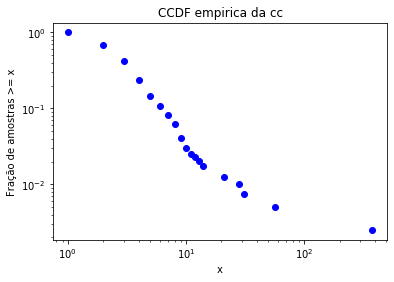

In [7]:
plot_ccdf_cc_log(G)

In [8]:
def distance_largest_component (G):
    # Extraindo a componente gigante
    components = list(max(nx.connected_components(G), key=len)) 
    S = G.subgraph(components)

    distances = []
    for i in range(len(components)-1):
        for j in range(i+1,len(components)):
            distances.append(nx.shortest_path_length(S, source = components[i], target=components[j]))
    return distances


def plot_pdf_distance(distances):
    contar_distancia = Counter(distances)
    dist, cnt = zip(*contar_distancia.items())
    dist = list(dist)
    cnt = list(cnt)

    # Calcula o percentual da distancia(pdf)
    perc = [0]*len(cnt)
    for idx, d in enumerate(cnt):
        perc[idx] = round(d/len(distances),4)

    plt.figure(figsize = (12,7))
    plt.plot(dist, perc, 'bo')
    
    plt.title("PDF da distancia")
    plt.ylabel("Fração de amostras = x")
    plt.xlabel("x")
    
    plt.xticks([d for d in dist], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()

def plot_cdf_distance(G):
    contar_distancia = Counter(distances)
    dist, cnt = zip(*contar_distancia.items())
    dist = list(dist)
    cnt = list(cnt)
    distancias = sorted(zip(dist, cnt), key=lambda x:x[0])
    #print(distancias)
    # Calcula o percentual da distancia(pdf)
    perc = [0]*len(cnt)
    for idx, d in distancias:
        val = round(d/len(distances),4)
     #   print(val)
        perc[idx-1] = val  
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
      #  print(ite, perc_cdf[ite])
        ite += 1
    
    plt.figure(figsize = (12,7))
    plt.plot(sorted(dist), perc_cdf, 'bo')
  
    plt.title("CDF da distancia")
    plt.ylabel("Fração de amostras <= x")
    plt.xlabel("x")
    
    plt.xticks([d for d in dist], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()
    
def plot_ccdf_distance(G):
    contar_distancia = Counter(distances)
    dist, cnt = zip(*contar_distancia.items())
    dist = list(dist)
    cnt = list(cnt)
    distancias = sorted(zip(dist, cnt), key=lambda x:x[0])
    #print(distancias)
    # Calcula o percentual da distancia(pdf)
    perc = [0]*len(cnt)
    for idx, d in distancias:
        val = round(d/len(distances),4)
     #   print(val)
        perc[idx-1] = val  
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
      #  print(ite, perc_cdf[ite])
        ite += 1
    
    # Calculando a ccdf
    perc_ccdf = []
    for ite in range(len(perc_cdf)):
        if ite == 0:
            perc_ccdf.append(1)
        else:
            perc_ccdf.append(1 - perc_cdf[(ite - 1)])
        
    plt.figure(figsize = (12,7))
    plt.plot(sorted(dist), perc_ccdf, 'bo')
  
    plt.title("CCDF empirica da distancia")
    plt.ylabel("Fração de amostras >= x")
    plt.xlabel("x")
    
    plt.xticks([d for d in dist], rotation=0)

    #plt.savefig('nome_da_imagem.png')
    plt.show()
    
def plot_ccdf_distance_log(G):
    contar_distancia = Counter(distances)
    dist, cnt = zip(*contar_distancia.items())
    dist = list(dist)
    cnt = list(cnt)
    distancias = sorted(zip(dist, cnt), key=lambda x:x[0])
    #print(distancias)
    # Calcula o percentual da distancia(pdf)
    perc = [0]*len(cnt)
    for idx, d in distancias:
        val = round(d/len(distances),4)
     #   print(val)
        perc[idx-1] = val  
    
    # Calculando a cdf
    perc_cdf = []
    ite = 0
    for d in perc:
        if ite == 0:
            perc_cdf.append(d)
        else:
            perc_cdf.append(d + perc_cdf[(ite - 1)])
      #  print(ite, perc_cdf[ite])
        ite += 1
    
    # Calculando a ccdf
    perc_ccdf = []
    for ite in range(len(perc_cdf)):
        if ite == 0:
            perc_ccdf.append(1)
        else:
            perc_ccdf.append(1 - perc_cdf[(ite - 1)])
        
    plt.figure(figsize = (6,4))
    plt.plot(sorted(dist), perc_ccdf, 'bo')
  
    plt.title("CCDF empirica da distancia")
    plt.ylabel("Fração de amostras >= x")
    plt.xlabel("x")
    
    plt.xscale('log')
    plt.yscale('log')
    
    #plt.savefig('nome_da_imagem.png')
    plt.show()
    

In [9]:
distances = distance_largest_component(G)

In [10]:
print("\n----- Analise das distancias da maior componente conexa -----\n")
        
# Distancia
print("Distancia maxima: " + str(max(distances)))
print("Distancia minima: " + str(min(distances)))
print("Distancia media: " + str(round(np.mean(distances),4)))
print("Mediana da distancia: " + str(np.median(distances)))
print("Desvio padrão da distancia: " + str(round(np.std(distances),4)))
print()

largest_cc = max(nx.connected_components(G), key=len)
dens = nx.diameter(G.subgraph(largest_cc))
#print("diametro: " + str(dens))
# maior distancia de um vertice a todos os outros do subgrafo e(u) = max[d(u,v)]
ecc = nx.eccentricity(G.subgraph(largest_cc))
#print(max(ecc.items(),key= lambda x: x[1]))


----- Analise das distancias da maior componente conexa -----

Distancia maxima: 17
Distancia minima: 1
Distancia media: 6.0419
Mediana da distancia: 6.0
Desvio padrão da distancia: 2.3445



# Plots

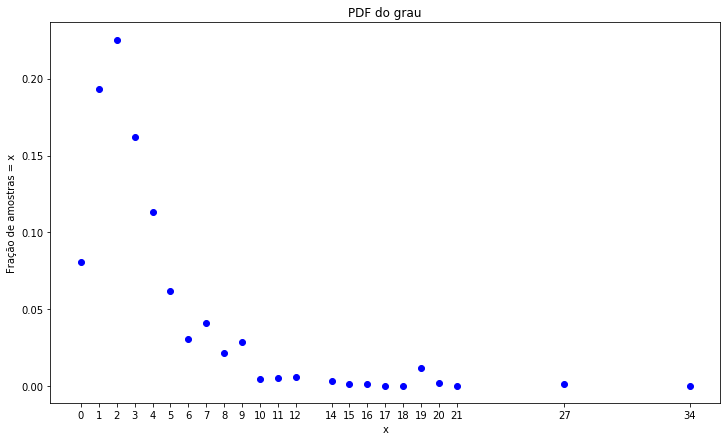

In [11]:
plot_pdf_degree(G)

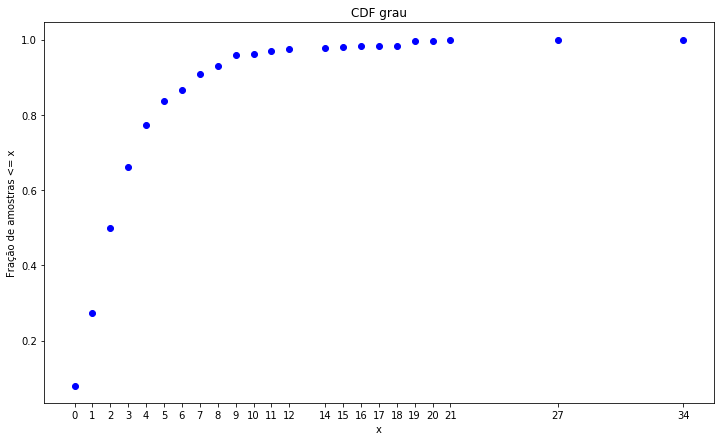

In [12]:
plot_cdf_degree(G)

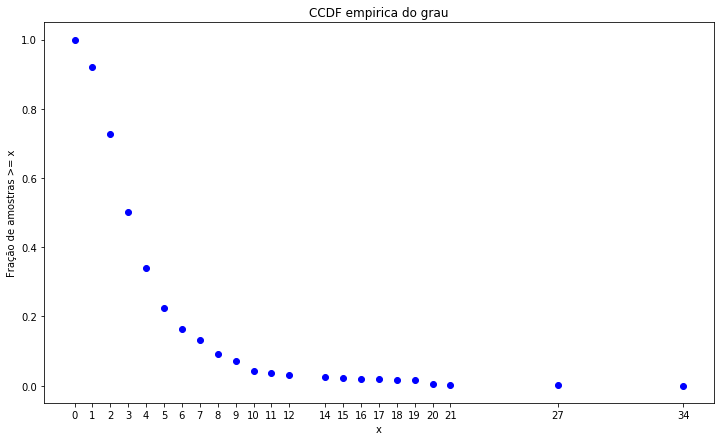

In [13]:
plot_ccdf_degree(G)

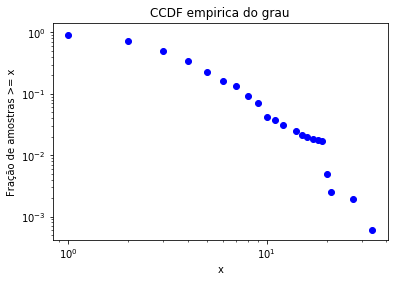

In [14]:
plot_ccdf_degree_log(G)

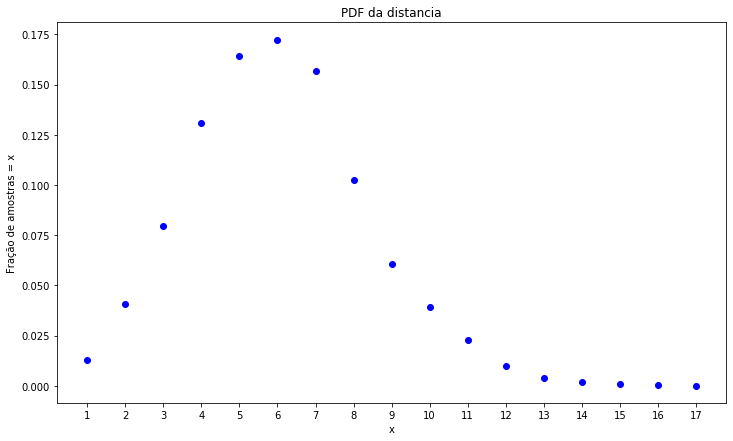

In [15]:
plot_pdf_distance(distances)

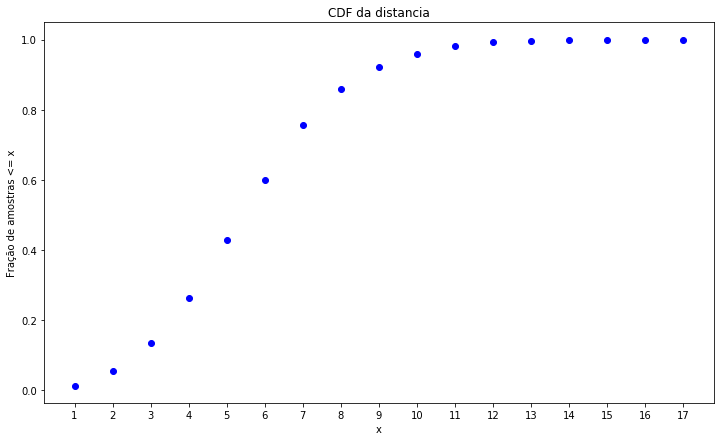

In [16]:
plot_cdf_distance(distances)

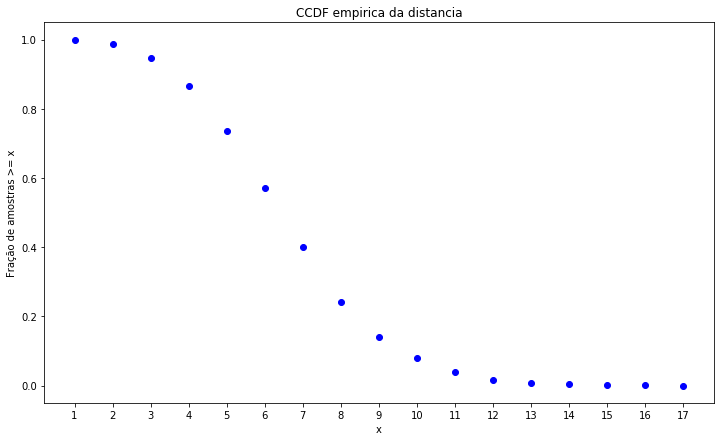

In [17]:
plot_ccdf_distance(distances)

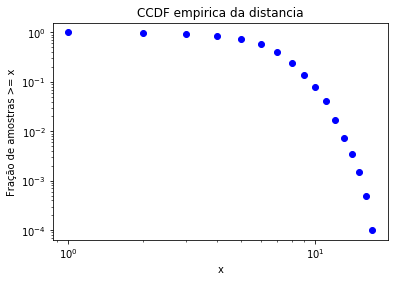

In [18]:
plot_ccdf_distance_log(distances)